# Vector Data I/O in Python

Reading data into Python is usually the first step of an analysis workflow. There are various different GIS data formats available such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), and [GPKG](https://en.wikipedia.org/wiki/GeoPackage). [Geopandas](http://geopandas.org/io.html) is capable of reading data from all of these formats (plus many more). 

This tutorial will show some typical examples how to read (and write) data from different sources. The main point in this section is to demonstrate the basic syntax for reading and writing data using short code snippets. You can find the example data sets in the data-folder. However, most of the example databases do not exists, but you can use and modify the example syntax according to your own setup.

## File formats

In geopandas, we use a generic function [from_file()](http://geopandas.org/reference.html#geopandas.GeoDataFrame.to_file) for reading in different data formats. In the bacground, Geopandas uses [fiona.open()](https://fiona.readthedocs.io/en/latest/fiona.html#fiona.open) when reading in data. Esri Shapefile is the default file format. For other file formats we need to specify which driver to use for reading in the data. 

You can check supported format drivers through geopandas, or directly from fiona: 

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

# Check supported format drivers
import fiona

# Same as:
#import fiona
fiona.supported_drivers


# get the current directory
import os
cwd=os.getcwd()

### Read / write GeoDatabase

In [22]:
# Read file from File Geodatabase
fp = os.path.join(cwd,"../qgis/clipped_mv.gpkg")
# list the layers
layers=fiona.listlayers(fp)
layers=['BigIslands', 'SmallIslands', 'VerySmallIslands']
print(layers)
#layers=['USGSEsriWCMC_GlobalIslandsv2_BigIslands', 'USGSEsriWCMC_GlobalIslandsv2_SmallIslands']

# maldives
bbox = [70.796682, -1.723392, 74.630910, 7.755728,]

data = [ gpd.read_file(fp, layer=layer,   bbox=None) for layer in layers]

data

['BigIslands', 'SmallIslands', 'VerySmallIslands']


[    OBJECTID_1       Name_USGSO           Plate  USGS_ISID  NEAR_FID  \
 0         1024       Fuvahmulah     Molucca Sea     330119        -1   
 1         9056   Minicoy Island           India     325390    220265   
 2        12933              Gan           Sunda     330094     38424   
 3        12945        Hithadhoo           Sunda     330107     38729   
 4        12946        Hulhudhoo      Birds Head     330108     38425   
 5        12980      Gaaf Dhaalu           India     330151     38476   
 6        12986          UNNAMED      Birds Head     330157     38630   
 7        12992      Hoandehdhoo         Pacific     330163     38435   
 8        12996       Kaadehdhoo           Sunda     330167     38542   
 9        12998          Kon Dey           Sunda     330169     38463   
 10       13000        Thinadhoo      Birds Head     330171     38550   
 11       13004       Villingili           Sunda     330175     38536   
 12       13042        Hithadhoo           Sunda   

In [35]:
for gdf in data:
    # Extract the centroids and convert them to a GeoDataFrame
    centroids = gdf.geometry.centroid
    centroid_gdf = gpd.GeoDataFrame(geometry=centroids)
    centroid_gdf=centroid_gdf.to_crs(epsg=4326)

    # Extract the centroid coordinates as separate columns
    gdf["LON"] = centroid_gdf.geometry.x
    gdf["LAT"] = centroid_gdf.geometry.y
 
    # Print the first rows of the GeoDataFrame
    #print(gdf.head())
    gdf['LON']

In [36]:
data[0]

,OBJECTID_1,Name_USGSO,Plate,USGS_ISID,NEAR_FID,NEAR_DIST,ALL_Uniq,Linework_S,Meaning_AL,ID_GID,...,Shape_Leng,IslandArea,IslandCoas,Area_Geode,Coast_Geod,Shape_Length,Shape_Area,geometry,LON,LAT
0,1024,Fuvahmulah,Molucca Sea,330119,-1,-1.0,88882,USGS: Sayre et al. 2018,USGS poly had no WCMC poly within 300m,0.0,...,12051.634559,6.069961,12.051635,6.029329,11.782320,12051.634559,6.069961e+06,"MULTIPOLYGON (((7358081.693 -34144.946, 735808...",73.424747,-0.296090
1,9056,Minicoy Island,India,325390,220265,0.0,279950,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,35651.0,...,22991.507682,4.724711,22.991508,4.694385,22.932670,22991.507682,4.724711e+06,"MULTIPOLYGON (((7276297.452 1027782.456, 72762...",73.047258,8.277763
2,12933,Gan,Sunda,330094,38424,0.0,283831,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,22890.0,...,9421.997630,3.296840,9.421998,3.274776,9.765793,9421.997630,3.296840e+06,"MULTIPOLYGON (((7330556.842 -84774.828, 733059...",73.153498,-0.694069
3,12945,Hithadhoo,Sunda,330107,38729,0.0,283843,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,23895.0,...,26106.991370,5.225148,26.106991,5.190177,24.975677,26106.991370,5.225148e+06,"MULTIPOLYGON (((7325070.367 -71558.425, 732507...",73.090254,-0.609140
4,12946,Hulhudhoo,Birds Head,330108,38425,0.0,283844,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,22896.0,...,16335.411577,3.111278,16.335412,3.090454,16.010781,16335.411577,3.111278e+06,"MULTIPOLYGON (((7337094.076 -71294.405, 733709...",73.229560,-0.588744
5,12980,Gaaf Dhaalu,India,330151,38476,0.0,283878,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,22988.0,...,5529.149781,1.959484,5.529150,1.946367,5.612268,5529.149781,1.959484e+06,"MULTIPOLYGON (((7344301.485 28949.590, 7344375...",73.273660,0.227383
6,12986,UNNAMED,Birds Head,330157,38630,0.0,283884,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,23620.0,...,7907.936840,2.450583,7.907937,2.434179,7.800674,7907.936840,2.450583e+06,"MULTIPOLYGON (((7360952.054 35345.920, 7360985...",73.432671,0.277394
7,12992,Hoandehdhoo,Pacific,330163,38435,0.0,283890,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,22907.0,...,7324.279790,1.078554,7.324280,1.071334,7.220595,7324.279790,1.078554e+06,"MULTIPOLYGON (((7316522.833 55877.958, 7316556...",73.003581,0.444974
8,12996,Kaadehdhoo,Sunda,330167,38542,0.0,283894,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,23270.0,...,6055.887474,1.827257,6.055887,1.815027,5.779067,6055.887474,1.827257e+06,"MULTIPOLYGON (((7315618.473 61501.621, 7315656...",72.993814,0.487514
9,12998,Kon Dey,Sunda,330169,38463,0.0,283896,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,22953.0,...,5254.567863,1.174689,5.254568,1.166826,5.040518,5254.567863,1.174689e+06,"MULTIPOLYGON (((7370634.130 62829.062, 7370729...",73.548901,0.498713


In [97]:

#for each dataframe add a column with last part of layer name after _
for i in range(len(data)):
    data[i]['layer']=layers[i].split("_")[-1]

alldata=gpd.GeoDataFrame(pd.concat(data, ignore_index=True))
# drop records with "Continents" in the layer column
alldata=alldata[alldata.layer!="Continents"]
alldata=alldata[alldata.layer!="VerySmallIslands"]
ac=alldata.copy()
ac['layer']="All islands"
alldataplus=gpd.GeoDataFrame(pd.concat([alldata,ac], ignore_index=True))

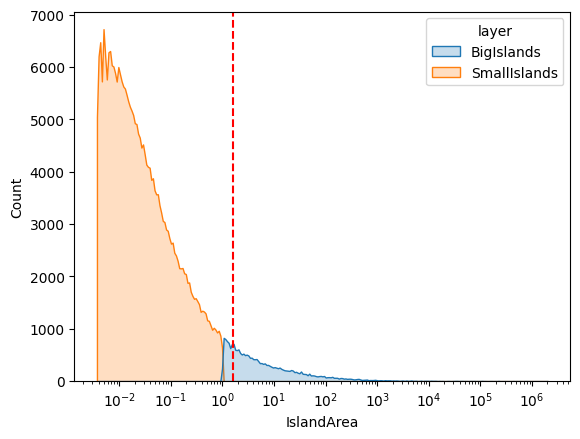

In [98]:
# Fit a distribution to IslandArea in all data and plot
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.histplot(alldata, x='IslandArea',  log_scale=True, hue='layer',  element="poly")
# Calculate and draw lines for the 75th, 90th, and 99th percentiles for each layer
percentiles = [94]
colors = ['red', 'green', 'blue']  # Different color for each percentile line

for i, percentile in enumerate(percentiles):
    # Calculate the percentile value across all data
    value = np.percentile(alldata['IslandArea'], percentile)
    plt.axvline(x=value, color=colors[i], linestyle='--', label=f'{percentile}th percentile')

# Add a legend to the plot at the bottom right
#plt.legend(title='Percentiles', loc='lower right')
#plt.legend(title='Percentiles')
plt.show()


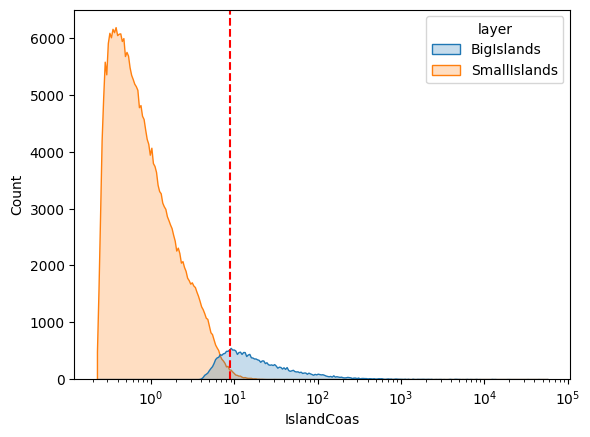

In [99]:
# Fit a distribution to IslandArea in all data and plot
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.histplot(alldata, x='IslandCoas',  log_scale=True, hue='layer',  element="poly")
# Calculate and draw lines for the 75th, 90th, and 99th percentiles for each layer
percentiles = [95]
colors = ['red', 'green', 'blue']  # Different color for each percentile line

for i, percentile in enumerate(percentiles):
    # Calculate the percentile value across all data
    value = np.percentile(alldata['IslandCoas'], percentile)
    plt.axvline(x=value, color=colors[i], linestyle='--', label=f'{percentile}th percentile')

# Add a legend to the plot at the bottom right
#plt.legend(title='Percentiles', loc='lower right')
#plt.legend(title='Percentiles')
plt.show()

In [96]:
alldata.groupby('layer')['IslandArea'].agg(['min', 'max'])

,min,max
layer,,
BigIslands,9.937926e-01,2.108459e+06
SmallIslands,3.580184e-03,1.006380e+00
VerySmallIslands,2.088581e-08,7.329914e-02


In [67]:
labels

[]

In [95]:
alldata['NAME_wcmcI']

0                            
1                            
2                            
3                            
4                            
                 ...         
369397             Green Rock
369398            Takapu Rock
369399            Dagger Rock
369400    Little Ichaboe Rock
369401     Stompneus Bay Rock
Name: NAME_wcmcI, Length: 369396, dtype: object